In [1]:
import gtsam
import numpy as np
import matplotlib.pyplot as plt

Values with 6 values:
Value l1: (Eigen::Matrix<double, -1, 1, 0, -1, 1>)
[
	4;
	-4.59636e-08
]

Value l2: (Eigen::Matrix<double, -1, 1, 0, -1, 1>)
[
	6;
	-4.59639e-08
]

Value o1: (gtsam::Pose2)
(0, 0, 0)

Value x1: (gtsam::Pose2)
(2, 1.09173e-14, 8.18781e-15)

Value x2: (gtsam::Pose2)
(4, 3.27518e-14, 1.0917e-14)

Value x3: (gtsam::Pose2)
(6, 5.45857e-14, 1.0917e-14)



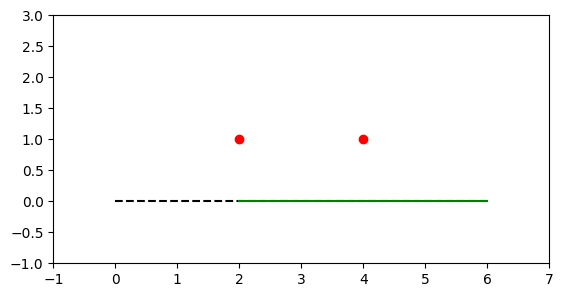

In [6]:
graph = gtsam.NonlinearFactorGraph()
initialEstimate = gtsam.Values()

# Add a prior on the first pose, setting it to the origin
priorMean = gtsam.Pose2(0, 0, 0)
priorNoise = gtsam.noiseModel.Diagonal.Sigmas(np.array([0.0, 0.0, 0.0]))
prior_symbol = gtsam.symbol('o', 1)
graph.add(gtsam.PriorFactorPose2(prior_symbol, priorMean, priorNoise))
initialEstimate.insert(prior_symbol, priorMean)

# Add odometry factors
odometryNoise = gtsam.noiseModel.Diagonal.Sigmas(np.array([0.2, 0.2, 0.1]))
odometry_symbol_1 = gtsam.symbol('x', 1)
graph.add(gtsam.BetweenFactorPose2(prior_symbol, odometry_symbol_1, gtsam.Pose2(2, 0, 0), odometryNoise))
initialEstimate.insert(odometry_symbol_1, gtsam.Pose2(2, 0, 0))

odometry_symbol_2 = gtsam.symbol('x', 2)
graph.add(gtsam.BetweenFactorPose2(odometry_symbol_1, odometry_symbol_2, gtsam.Pose2(2, 0, 0), odometryNoise))
initialEstimate.insert(odometry_symbol_2, gtsam.Pose2(4, 0, 0))

odometry_symbol_3 = gtsam.symbol('x', 3)
graph.add(gtsam.BetweenFactorPose2(odometry_symbol_2, odometry_symbol_3, gtsam.Pose2(2, 0, 0), odometryNoise))
initialEstimate.insert(odometry_symbol_3, gtsam.Pose2(6, 0, 0))

# Add landmark observations
landmarkNoise = gtsam.noiseModel.Diagonal.Sigmas(np.array([0.3, 0.3]))
landmark_symbol_1 = gtsam.symbol('l', 1)
graph.add(gtsam.BearingRangeFactor2D(odometry_symbol_1, landmark_symbol_1, gtsam.Rot2(0), 2, landmarkNoise))
initialEstimate.insert(landmark_symbol_1, gtsam.Point2(2, 1))

landmark_symbol_2 = gtsam.symbol('l', 2)
graph.add(gtsam.BearingRangeFactor2D(odometry_symbol_2, landmark_symbol_2, gtsam.Rot2(0), 2, landmarkNoise))
initialEstimate.insert(landmark_symbol_2, gtsam.Point2(4, 1))


# optimize
optimizer = gtsam.LevenbergMarquardtOptimizer(graph, initialEstimate)
result = optimizer.optimize()
result.print()

# plot
fig, ax = plt.subplots()
ax.set_xlim([-1, 7])
ax.set_ylim([-1, 3])
ax.set_aspect('equal')

# plot ground truth
ax.plot([0, 2, 4, 6], [0, 0, 0, 0], 'k--', label='ground truth')

# plot landmarks
ax.plot([2, 4], [1, 1], 'ro', label='landmarks')

# plot initial estimate
initialEstimatePose = []
for i in range(1,4):
    initialEstimatePose.append(initialEstimate.atPose2(gtsam.symbol('x', i)))
initialEstimatePose = np.array([[p.x(), p.y()] for p in initialEstimatePose])
ax.plot(initialEstimatePose[:,0], initialEstimatePose[:,1], 'g', label='initial estimate')
